In [6]:
# Importing necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Step 1: Dataset
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Normalize features
data.iloc[:, :-1] = (data.iloc[:, :-1] - data.iloc[:, :-1].mean()) / data.iloc[:, :-1].std()




Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [8]:
# Step 2: Model
# Splitting the data into training and testing sets
X = data.iloc[:, :-1]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Steps 3: Evaluation of the model
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



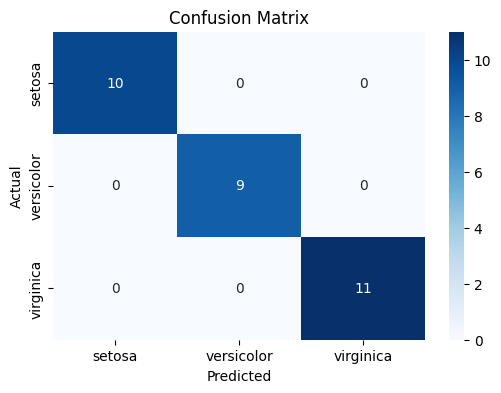

In [10]:
# Step 4: Optional Features
# Visualizing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

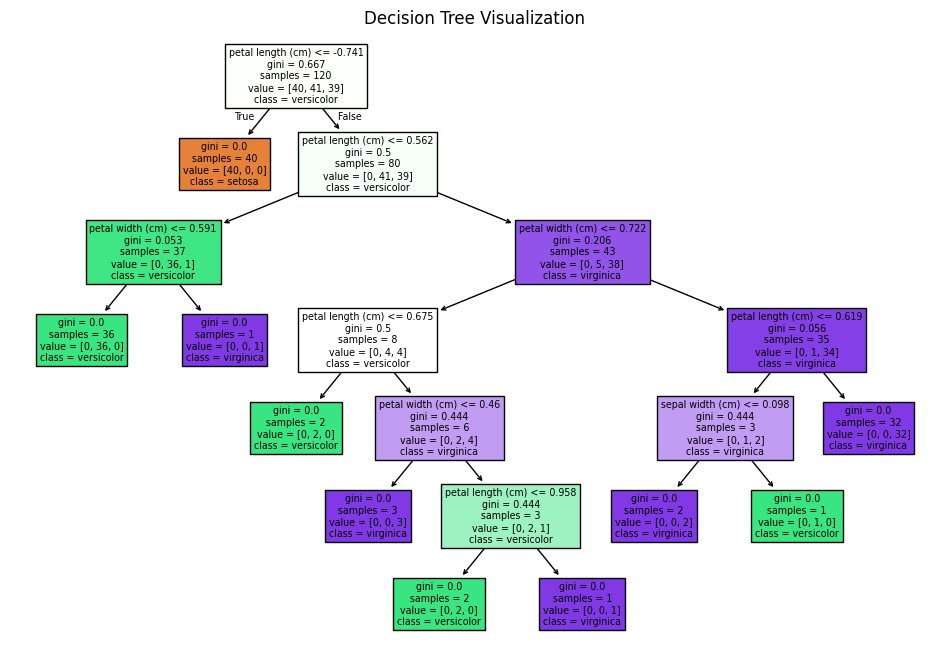

In [11]:

# Plotting the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [12]:
# Step 5: Prediction
# Predict on new data
sample_data = [[5.1, 3.5, 1.4, 0.2]]  # Replace with new data
sample_data = (sample_data - X.mean().values) / X.std().values  # Normalize new data
sample_prediction = model.predict(sample_data)
print("Sample Prediction:", iris.target_names[sample_prediction[0]])

Sample Prediction: virginica


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
